In [4]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np
from pandas import Series

In [5]:
train_data = pd.read_csv(r"C:/01 Projects/07 Personal_Projects/06 Hackathon/01_WNS_Analytics_Wizard/train_NA17Sgz/train.csv")
train_data.shape

(237609, 7)

In [6]:
item_data = pd.read_csv(r"C:\01 Projects\07 Personal_Projects\06 Hackathon\01_WNS_Analytics_Wizard\train_NA17Sgz\item_data.csv")
item_data.shape

(132761, 6)

In [7]:
view_log_data = pd.read_csv(r"C:\01 Projects\07 Personal_Projects\06 Hackathon\01_WNS_Analytics_Wizard\train_NA17Sgz\view_log.csv")
view_log_data.shape

(3118622, 5)

In [8]:
item_data.head()

,item_id,item_price,category_1,category_2,category_3,product_type
0,26880,4602,11,35,20,3040
1,54939,3513,12,57,85,6822
2,40383,825,17,8,279,1619
3,8777,2355,13,58,189,5264
4,113705,1267,17,39,151,10239


In [9]:
category3_group=item_data.groupby("category_3").count()

<BarContainer object of 335 artists>

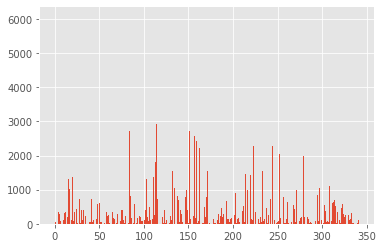

In [10]:
plt.bar(category3_group.index, category3_group.item_id)

In [11]:
producttype_group=item_data.groupby("product_type").count()

<BarContainer object of 7959 artists>

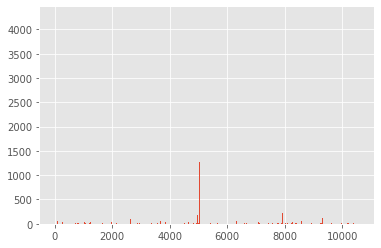

In [12]:
plt.bar(producttype_group.index,producttype_group.item_id)

In [13]:
view_log_data.dtypes

server_time    object
device_type    object
session_id      int64
user_id         int64
item_id         int64
dtype: object

In [14]:
view_log_data["server_time"] = pd.to_datetime(view_log_data["server_time"])

In [15]:
view_log_data.dtypes

server_time    datetime64[ns]
device_type            object
session_id              int64
user_id                 int64
item_id                 int64
dtype: object

In [16]:
view_log_data_rel = view_log_data[view_log_data.server_time > pd.to_datetime("14-Nov-2018")]

In [17]:
view_log_data_rel.shape

(1609755, 5)

In [18]:
merged_log_item = pd.merge(view_log_data_rel,item_data,how="inner")

In [19]:
merged_log_item.shape,train_data.shape

((1608654, 10), (237609, 7))

In [20]:
merged_log_item.dtypes

server_time     datetime64[ns]
device_type             object
session_id               int64
user_id                  int64
item_id                  int64
item_price               int64
category_1               int64
category_2               int64
category_3               int64
product_type             int64
dtype: object

In [21]:
train_data.dtypes

impression_id      object
impression_time    object
user_id             int64
app_code            int64
os_version         object
is_4G               int64
is_click            int64
dtype: object

In [22]:
train_data.impression_time = pd.to_datetime(train_data.impression_time)

In [23]:
train_data.dtypes

impression_id              object
impression_time    datetime64[ns]
user_id                     int64
app_code                    int64
os_version                 object
is_4G                       int64
is_click                    int64
dtype: object

In [24]:
train_data.head()
    

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,0
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1
2,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,71748,259,intermediate,1,0
3,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,244,latest,1,0
4,182be0c5cdcd5072bb1864cdee4d3d6e,2018-11-15 00:02:00,62873,473,latest,0,0


In [25]:
train_data_sub = train_data[train_data.user_id == 69209]

In [26]:
train_data_sub

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click
3,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,244,latest,1,0
12949,90797bef9ef6175e04f3c9383568f9e4,2018-11-17 20:11:00,69209,244,latest,0,0
33799,3e4e67cbedefff39bd73f98f01e7e066,2018-11-17 20:13:00,69209,244,latest,0,0
44711,45e3e10e634fe325178b335b656c0374,2018-11-22 02:21:00,69209,244,latest,0,0


In [27]:
train_data_sub_merge = pd.merge(train_data_sub, merged_log_item, how="inner")

In [28]:
train_data_sub_merge

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click,server_time,device_type,session_id,item_id,item_price,category_1,category_2,category_3,product_type
0,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,244,latest,1,0,2018-11-14 19:01:00,android,358781,104035,819,8,21,139,2944
1,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,244,latest,1,0,2018-11-14 18:44:00,android,358781,2121,249,0,45,117,6379
2,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,244,latest,1,0,2018-11-14 18:48:00,android,358781,2121,249,0,45,117,6379
3,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,244,latest,1,0,2018-11-17 12:43:00,android,33764,120027,3827,4,38,62,2106
4,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,244,latest,1,0,2018-11-23 16:39:00,android,29945,132853,18179,1,42,157,4986
5,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,244,latest,1,0,2018-11-14 18:56:00,android,358781,2715,1601,14,61,159,7093
6,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,244,latest,1,0,2018-11-14 18:58:00,android,358781,2715,1601,14,61,159,7093
7,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,244,latest,1,0,2018-11-14 19:01:00,android,358781,2715,1601,14,61,159,7093
8,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,244,latest,1,0,2018-11-14 18:59:00,android,358781,1528,7320,9,44,114,3528
9,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,244,latest,1,0,2018-11-14 19:01:00,android,358781,1528,7320,9,44,114,3528


In [29]:
merged_log_item[merged_log_item.user_id == 69209].count()

server_time     15
device_type     15
session_id      15
user_id         15
item_id         15
item_price      15
category_1      15
category_2      15
category_3      15
product_type    15
dtype: int64

In [30]:
train_data_log_merge = pd.merge(train_data, merged_log_item, how="inner")

In [31]:
train_data_log_merge.shape

(5731699, 16)

In [32]:
train_data_log_merge.head()

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click,server_time,device_type,session_id,item_id,item_price,category_1,category_2,category_3,product_type
0,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1,2018-11-24 05:29:00,android,983607,97274,2630,10,43,223,3055
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1,2018-12-10 20:03:00,android,135003,22064,1024,11,76,67,8411
2,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1,2018-12-10 19:48:00,android,135003,109074,6330,10,63,295,9337
3,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1,2018-12-10 19:59:00,android,135003,109074,6330,10,63,295,9337
4,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1,2018-12-10 19:51:00,android,135003,58018,1888,13,52,163,2734


In [33]:
train_data_log_merge.impression_id[0]

'45c48cce2e2d7fbdea1afc51c7c6ad26'

In [34]:
sub10 = train_data_log_merge.head(10)

In [35]:
sub100000 = train_data_log_merge.head(100000)

In [36]:
train_data_log_merge_sub = train_data_log_merge[((train_data_log_merge.impression_time > train_data_log_merge.server_time) & (train_data_log_merge.impression_time < (train_data_log_merge.server_time + pd.Timedelta(7, unit='D'))))]

In [37]:
train_data_log_merge_sub.shape

(1569610, 16)

In [38]:
train_data_log_merge_sub.columns

Index(['impression_id', 'impression_time', 'user_id', 'app_code', 'os_version',
       'is_4G', 'is_click', 'server_time', 'device_type', 'session_id',
       'item_id', 'item_price', 'category_1', 'category_2', 'category_3',
       'product_type'],
      dtype='object')

In [39]:
test_pt = train_data_log_merge_sub.groupby("category_3").is_click.mean()

In [40]:
test_pt.shape

(327,)

In [41]:
test_pt = pd.DataFrame(test_pt)

In [42]:
test_pt.reset_index(level=0,inplace=True)

<BarContainer object of 327 artists>

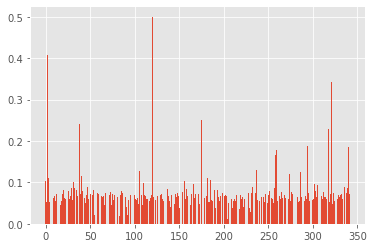

In [43]:
plt.bar(test_pt.category_3, test_pt.is_click)

In [44]:
test_pt

,category_3,is_click
0,0,0.104478
1,1,0.052800
2,2,0.407407
3,3,0.111111
4,4,0.051711
5,5,0.066940
6,6,0.037855
7,7,0.037441
8,9,0.063208
9,10,0.066667


In [45]:
train_data_log_merge.shape

(5731699, 16)

In [46]:
train_data_log_merge_sub.shape

(1569610, 16)

In [47]:
train_data_log_merge_sub.head()

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click,server_time,device_type,session_id,item_id,item_price,category_1,category_2,category_3,product_type
75,3a51c0cc61bfaa0e84c4cc413c31134b,2018-11-26 01:52:00,63410,467,latest,1,0,2018-11-24 05:29:00,android,983607,97274,2630,10,43,223,3055
80,a7218790a88ae62c27ee5cf5e2b2947d,2018-11-25 09:32:00,63410,467,latest,1,0,2018-11-24 05:29:00,android,983607,97274,2630,10,43,223,3055
85,16f42bc674b157e63a78a75a5b449c90,2018-11-27 02:54:00,63410,283,latest,1,0,2018-11-24 05:29:00,android,983607,97274,2630,10,43,223,3055
110,a6fbd1e24f7767cb48b9ec532d396d52,2018-11-25 02:06:00,63410,467,latest,1,0,2018-11-24 05:29:00,android,983607,97274,2630,10,43,223,3055
115,c9514b2f4933a409cdc480511ef9137b,2018-11-29 01:52:00,63410,467,latest,1,0,2018-11-24 05:29:00,android,983607,97274,2630,10,43,223,3055


In [48]:
train_data_log_merge_sub[train_data_log_merge_sub.user_id==63410].sort_values(["impression_time","server_time"])

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click,server_time,device_type,session_id,item_id,item_price,category_1,category_2,category_3,product_type
110,a6fbd1e24f7767cb48b9ec532d396d52,2018-11-25 02:06:00,63410,467,latest,1,0,2018-11-24 05:29:00,android,983607,97274,2630,10,43,223,3055
80,a7218790a88ae62c27ee5cf5e2b2947d,2018-11-25 09:32:00,63410,467,latest,1,0,2018-11-24 05:29:00,android,983607,97274,2630,10,43,223,3055
120,6e2253d472803d93d15023a5adacbcc4,2018-11-26 00:42:00,63410,467,latest,1,0,2018-11-24 05:29:00,android,983607,97274,2630,10,43,223,3055
75,3a51c0cc61bfaa0e84c4cc413c31134b,2018-11-26 01:52:00,63410,467,latest,1,0,2018-11-24 05:29:00,android,983607,97274,2630,10,43,223,3055
130,6558c7e9646d26750d8cff3100f641a5,2018-11-27 02:48:00,63410,467,latest,1,0,2018-11-24 05:29:00,android,983607,97274,2630,10,43,223,3055
85,16f42bc674b157e63a78a75a5b449c90,2018-11-27 02:54:00,63410,283,latest,1,0,2018-11-24 05:29:00,android,983607,97274,2630,10,43,223,3055
135,b1c33690ad8070f6a23ed9d9828277df,2018-11-29 01:23:00,63410,467,latest,1,0,2018-11-24 05:29:00,android,983607,97274,2630,10,43,223,3055
115,c9514b2f4933a409cdc480511ef9137b,2018-11-29 01:52:00,63410,467,latest,1,0,2018-11-24 05:29:00,android,983607,97274,2630,10,43,223,3055
125,92b5c00adaf3a6ba5dfd7288f7611470,2018-11-30 09:00:00,63410,467,latest,1,0,2018-11-24 05:29:00,android,983607,97274,2630,10,43,223,3055
145,f5bbba34889ade1e48dc9604e6e11ea4,2018-11-30 09:55:00,63410,467,latest,1,0,2018-11-24 05:29:00,android,983607,97274,2630,10,43,223,3055


In [49]:
train_data_log_merge_sub.shape, train_data_log_merge_sub.columns

((1569610, 16),
 Index(['impression_id', 'impression_time', 'user_id', 'app_code', 'os_version',
        'is_4G', 'is_click', 'server_time', 'device_type', 'session_id',
        'item_id', 'item_price', 'category_1', 'category_2', 'category_3',
        'product_type'],
       dtype='object'))

In [50]:
train_data_log_merge_sub.dtypes

impression_id              object
impression_time    datetime64[ns]
user_id                     int64
app_code                    int64
os_version                 object
is_4G                       int64
is_click                    int64
server_time        datetime64[ns]
device_type                object
session_id                  int64
item_id                     int64
item_price                  int64
category_1                  int64
category_2                  int64
category_3                  int64
product_type                int64
dtype: object

In [51]:
model_df = train_data_log_merge_sub[["impression_time","app_code","os_version","is_4G","is_click"]]
model_df.head()

,impression_time,app_code,os_version,is_4G,is_click
75,2018-11-26 01:52:00,467,latest,1,0
80,2018-11-25 09:32:00,467,latest,1,0
85,2018-11-27 02:54:00,283,latest,1,0
110,2018-11-25 02:06:00,467,latest,1,0
115,2018-11-29 01:52:00,467,latest,1,0


In [52]:
model_df.shape

(1569610, 5)

In [56]:
model_df["weekday"] = model_df.impression_time.dt.weekday

C:\08_Installations\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [53]:
model_df["hour"] = model_df.impression_time.dt.hour

C:\08_Installations\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [57]:
model_df.head()

,impression_time,app_code,os_version,is_4G,is_click,hour,weekday
75,2018-11-26 01:52:00,467,latest,1,0,1,0
80,2018-11-25 09:32:00,467,latest,1,0,9,6
85,2018-11-27 02:54:00,283,latest,1,0,2,1
110,2018-11-25 02:06:00,467,latest,1,0,2,6
115,2018-11-29 01:52:00,467,latest,1,0,1,3


In [58]:
model_df = model_df[["weekday","hour","app_code","os_version","is_4G","is_click"]]

In [59]:
model_df.reset_index(level=0,inplace=True)

In [60]:
model_df.head()

,index,weekday,hour,app_code,os_version,is_4G,is_click
0,75,0,1,467,latest,1,0
1,80,6,9,467,latest,1,0
2,85,1,2,283,latest,1,0
3,110,6,2,467,latest,1,0
4,115,3,1,467,latest,1,0


In [61]:
model_df.is_click.mean()

0.06474793101471066

In [62]:
# dummy encoding 
app_code_dummies = pd.get_dummies(model_df['app_code'],prefix='app_code')
model_df = pd.concat([model_df,app_code_dummies],axis=1)

In [63]:
os_version_dummies = pd.get_dummies(model_df['os_version'],prefix='os_version')
model_df = pd.concat([model_df,os_version_dummies],axis=1)

In [64]:
model_df_model= model_df

In [65]:
model_df_X = model_df_model.drop("is_click",axis=1)

In [66]:
y = np.asarray(model_df_model['is_click'])
y [0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [67]:
X = np.asarray(model_df_X)
X[0:5]

array([[75, 0, 1, ..., 0, 1, 0],
       [80, 6, 9, ..., 0, 1, 0],
       [85, 1, 2, ..., 0, 1, 0],
       [110, 6, 2, ..., 0, 1, 0],
       [115, 3, 1, ..., 0, 1, 0]], dtype=object)

In [71]:
model_df_X.dtypes

index                       int64
weekday                     int64
hour                        int64
app_code                    int64
os_version                 object
is_4G                       int64
app_code_0                  uint8
app_code_1                  uint8
app_code_2                  uint8
app_code_3                  uint8
app_code_4                  uint8
app_code_5                  uint8
app_code_6                  uint8
app_code_7                  uint8
app_code_8                  uint8
app_code_9                  uint8
app_code_12                 uint8
app_code_13                 uint8
app_code_14                 uint8
app_code_16                 uint8
app_code_17                 uint8
app_code_19                 uint8
app_code_20                 uint8
app_code_21                 uint8
app_code_22                 uint8
app_code_23                 uint8
app_code_24                 uint8
app_code_25                 uint8
app_code_26                 uint8
app_code_27   

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

NameError: name 'X' is not defined

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR